## Date Manipulation with Orders Data

In [178]:
#importing the basic libraries
import pandas as pd
import numpy as np
%matplotlib inline

In [118]:
#Orders data CSV file
ordersdf = pd.read_csv("Orders.Data.csv")
#Renaming Columns
ordersdf = ordersdf.rename(columns = {"order_purchase_timestamp": "Purchased_At",
                         "order_approved_at":"Approved_At",
                         "order_delivered_carrier_date": "Delivered_to_Carrier_On",
                         "order_delivered_customer_date": "Delivered_to_Customer_On",
                         "order_estimated_delivery_date": "Estimated_Delivery_On"}) 
# Select columns of interest

ordersdf = ordersdf[['Purchased_At', 'Approved_At', 'Delivered_to_Carrier_On', 'Delivered_to_Customer_On', 'Estimated_Delivery_On']]
# Changing variables type
ordersdf['Purchased_At'] = pd.to_datetime(ordersdf['Purchased_At'])
ordersdf['Approved_At'] = pd.to_datetime(ordersdf['Approved_At'])
ordersdf['Delivered_to_Carrier_On'] = pd.to_datetime(ordersdf['Delivered_to_Carrier_On'])
ordersdf['Delivered_to_Customer_On'] = pd.to_datetime(ordersdf['Delivered_to_Customer_On'])
ordersdf['Estimated_Delivery_On'] = pd.to_datetime(ordersdf['Estimated_Delivery_On'])

ordersdf


,Purchased_At,Approved_At,Delivered_to_Carrier_On,Delivered_to_Customer_On,Estimated_Delivery_On
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...
99436,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [119]:
#Average delay in order approval
between_order_approval = ordersdf['Approved_At'] - ordersdf['Purchased_At']

between_order_approval.apply(lambda x: (x.total_seconds())/3600).mean()


10.419094301919714

Q2: try to find out the reason as to why there is an average 10 hour time between giving of orders and approving them. 

I will first see and visualize the data through 
1. Display of Data (not helpful because we have about 99 thousands rows)
2. Discribe the data (describe) to see max, min etc (for this I will convert the data to integer or float type-measured in hours
3. Visualize the integer type data (in hours) through Box Plot, Bar Plot, Histogram (All of them indicate that there are ouliers)

In [120]:
# Step1
between_order_approval

0       0 days 00:10:42
1       1 days 06:42:50
2       0 days 00:16:34
3       0 days 00:17:53
4       0 days 01:01:50
              ...      
99436   0 days 00:00:00
99437   0 days 00:11:39
99438   0 days 00:17:33
99439   0 days 00:07:54
99440   0 days 14:22:58
Length: 99441, dtype: timedelta64[ns]

In [122]:
#Remove the missing values
df1 = between_order_approval.dropna(axis = 0, how ='any')
df1


0       0 days 00:10:42
1       1 days 06:42:50
2       0 days 00:16:34
3       0 days 00:17:53
4       0 days 01:01:50
              ...      
99436   0 days 00:00:00
99437   0 days 00:11:39
99438   0 days 00:17:33
99439   0 days 00:07:54
99440   0 days 14:22:58
Length: 99281, dtype: timedelta64[ns]

By removing the missing values, about 250 rows are deleted

In [134]:
# Converting into Hours and put into dataframe

df2 = df1.apply(lambda x: (x.total_seconds())/3600)
df3=pd.DataFrame(df2, columns = ['ODelay'])
df3

,ODelay
0,0.178333
1,30.713889
2,0.276111
3,0.298056
4,1.030556
...,...
99436,0.000000
99437,0.194167
99438,0.292500
99439,0.131667


In [135]:
df3.describe()

#max is too high (outliers)

,ODelay
count,99281.000000
mean,10.419094
std,26.038004
min,0.000000
25%,0.215000
50%,0.343333
75%,14.580833
max,4509.180556


<AxesSubplot:xlabel='ODelay'>

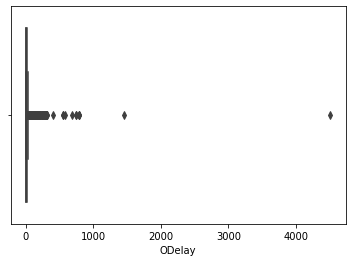

In [138]:
import seaborn as sns
sns.boxplot(x=df3['ODelay'])

#One extreme and some modrate level extremes are in the data

In [146]:
print('Values Greater than 2000 Hours')
print(np.where(df3 > 2000))
#shows that row number 47469 has Delay Hours higher than 2000
print('Values Greater than 1000 Hours')
print(np.where(df3 > 1000))
#Two rows have Delay Hours hugher than 1000
print('Values Greater than 500 Hours')
print(np.where(df3 > 500))
#Evelen rows have Delay Hours hugher than 500

Values Greater than 2000 Hours
(array([47469], dtype=int64), array([0], dtype=int64))
Values Greater than 1000 Hours
(array([47469, 62185], dtype=int64), array([0, 0], dtype=int64))
Values Greater than 500 Hours
(array([ 4387,  4532, 10050, 43618, 47469, 53383, 55609, 62185, 83010,
       88529, 96098], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


<AxesSubplot:>

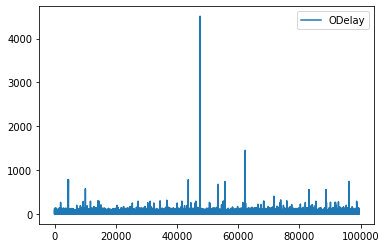

In [147]:
df3.plot()

array([[<AxesSubplot:title={'center':'ODelay'}>]], dtype=object)

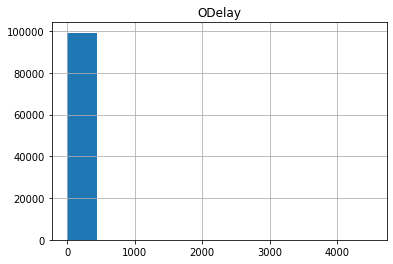

In [148]:
df3.hist()

All above indicate that there extreme values in the data and we should use some statistical tools to normalize the data. There are many ways, such as Z-score, interquartile, replacing with median values, trimming and winsorization. However, I am focusing only the first two methods


Working with Outliers: Correcting, Removing

Z-Score Method

The Z-score describes the data by finding its relationship with the Standard Normal Distribution. In calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [149]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df3))
print(z)

[[0.39330252]
 [0.77943367]
 [0.38954731]
 ...
 [0.38891788]
 [0.39509478]
 [0.15222762]]


<AxesSubplot:>

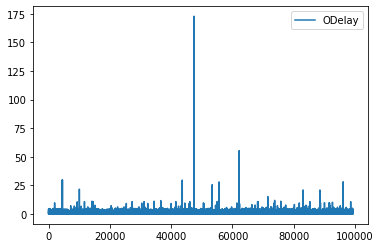

In [156]:
dd=pd.DataFrame(z, columns = ['ODelay'])
#dd.hist()
#dd.boxplot()
dd.plot()

In [157]:
threshold = 3
print(np.where(z > 3))

(array([   15,   150,   186, ..., 99217, 99246, 99255], dtype=int64), array([0, 0, 0, ..., 0, 0, 0], dtype=int64))


In [158]:
print(z[4387][0])

29.595696080724917


In [168]:
df4= df3[(z<3).all(axis=1)]
print('Date Shape with Outliers')
print(df3.shape)
print('Date Shape without Outliers')
print(df4.shape)

Date Shape with Outliers
(99281, 1)
Date Shape without Outliers
(98186, 1)


In [169]:
print('Mean Delay  of Date with Outliers')
print(df3.mean())
print('Mean Delay  of Date without Outliers')
print(df4.mean())


Mean Delay  of Date with Outliers
ODelay    10.419094
dtype: float64
Mean Delay  of Date without Outliers
ODelay    9.122073
dtype: float64


The result in above cell shows that there is no significant difference. Since the Z-Score method does not work in this case.
Next I am trying the interquartile range (IQR), which is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles.

In [170]:
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ODelay    14.365833
dtype: float64


In [174]:
df4=(df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))
df4
#The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

,ODelay
0,False
1,False
2,False
3,False
4,False
...,...
99436,False
99437,False
99438,False
99439,False


As we now have the IQR scores, it’s time to get hold on outliers. The below code will give an output with some true and false values. The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [175]:
#Removing the outliers
df5 = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
df5.shape

(90140, 1)

In [176]:
print('Date Shape with Outliers')
print(df3.shape)
print('Date Shape without Outliers')
print(df5.shape)

Date Shape with Outliers
(99281, 1)
Date Shape without Outliers
(90140, 1)


In [177]:
print('Mean Delay  of Date with Outliers')
print(df3.mean())
print('Mean Delay  of Date without Outliers')
print(df5.mean())

Mean Delay  of Date with Outliers
ODelay    10.419094
dtype: float64
Mean Delay  of Date without Outliers
ODelay    5.204837
dtype: float64


The average delay in this case reduced to 5